___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:,.2f}'.format

# Importing plotly and cufflinks in offline mode
import plotly.express as px
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
from termcolor import colored
import missingno as msno 

import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored, cprint



In [210]:
#!pip install colorama

In [211]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [212]:
df = pd.read_csv("/content/drive/MyDrive/Data Analiz/deep learninig/Churn_Modelling.csv")

In [213]:
###############################################################################

def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

def missing_values(df):
    return missing(df)[missing(df)['Missing_Number']>0]

###############################################################################

def first_look(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          f"There is ", df.shape[0], " observation and ", df.shape[1], " columns in the dataset.", '\n',
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("duplicates were dropped", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("No duplicates", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary drop some columns!!!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)
        else:
            print(df.isnull().sum()[i], '%, percentage of missing values of', i ,'less than limit', limit, '%, so we will keep it.')
    print('New shape after missing value control:', df.shape)

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [214]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [216]:
df.isnull().sum().any()

False

In [217]:
df.duplicated().value_counts()

False    10000
dtype: int64

In [218]:

df= df.apply(lambda x: x.astype(float) if x.dtype=="int64" else x)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  float64
 1   CustomerId       10000 non-null  float64
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  float64
 10  HasCrCard        10000 non-null  float64
 11  IsActiveMember   10000 non-null  float64
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  float64
dtypes: float64(11), object(3)
memory usage: 1.1+ MB


In [220]:
df.sample(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9953,9954.000,15655952.000,Burke,550.000,France,Male,47.000,2.000,0.000,2.000,1.000,1.000,97057.280,0.000
3850,3851.000,15775293.000,Stephenson,680.000,France,Male,34.000,3.000,143292.950,1.000,1.000,0.000,66526.010,0.000
4962,4963.000,15665088.000,Gordon,531.000,France,Female,42.000,2.000,0.000,2.000,0.000,1.000,90537.470,0.000
3886,3887.000,15720941.000,Tien,710.000,Germany,Male,34.000,8.000,147833.300,2.000,0.000,1.000,1561.580,0.000
5437,5438.000,15733476.000,Gonzalez,543.000,Germany,Male,30.000,6.000,73481.050,1.000,1.000,1.000,176692.650,0.000
8517,8518.000,15671800.000,Robinson,688.000,France,Male,20.000,8.000,137624.400,2.000,1.000,1.000,197582.790,0.000
2041,2042.000,15709846.000,Yeh,840.000,France,Female,39.000,1.000,94968.970,1.000,1.000,0.000,84487.620,0.000
1989,1990.000,15622454.000,Zaitsev,695.000,Spain,Male,28.000,0.000,96020.860,1.000,1.000,1.000,57992.490,0.000
1933,1934.000,15815560.000,Bogle,666.000,Germany,Male,74.000,7.000,105102.500,1.000,1.000,1.000,46172.470,0.000
9984,9985.000,15696175.000,Echezonachukwu,602.000,Germany,Male,35.000,7.000,90602.420,2.000,1.000,1.000,51695.410,0.000


In [221]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


0.000    7963
1.000    2037
Name: Exited, dtype: int64

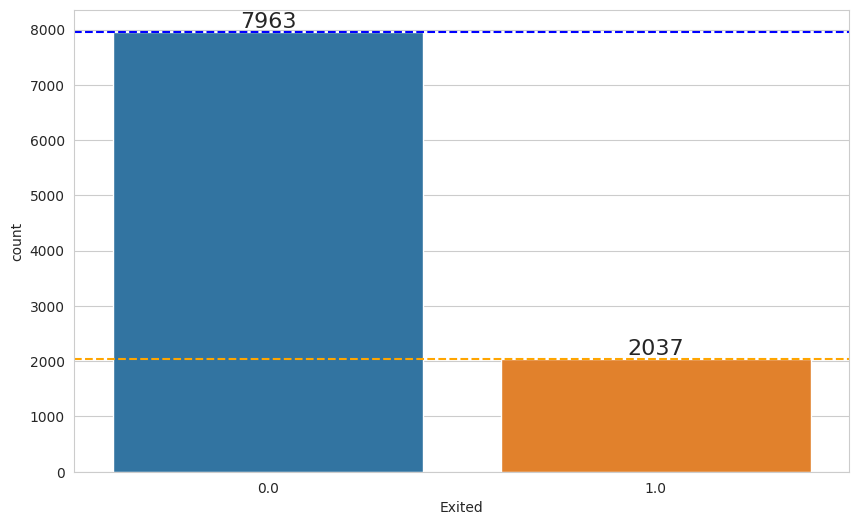

In [222]:
display(df.Exited.value_counts())
ax = sns.countplot(x=df["Exited"])
ax.bar_label(ax.containers[0], size=16)
plt.axhline(y=df.Exited.value_counts()[1], color='orange', linestyle='--')
plt.axhline(y=df.Exited.value_counts()[0], color='blue', linestyle='--');


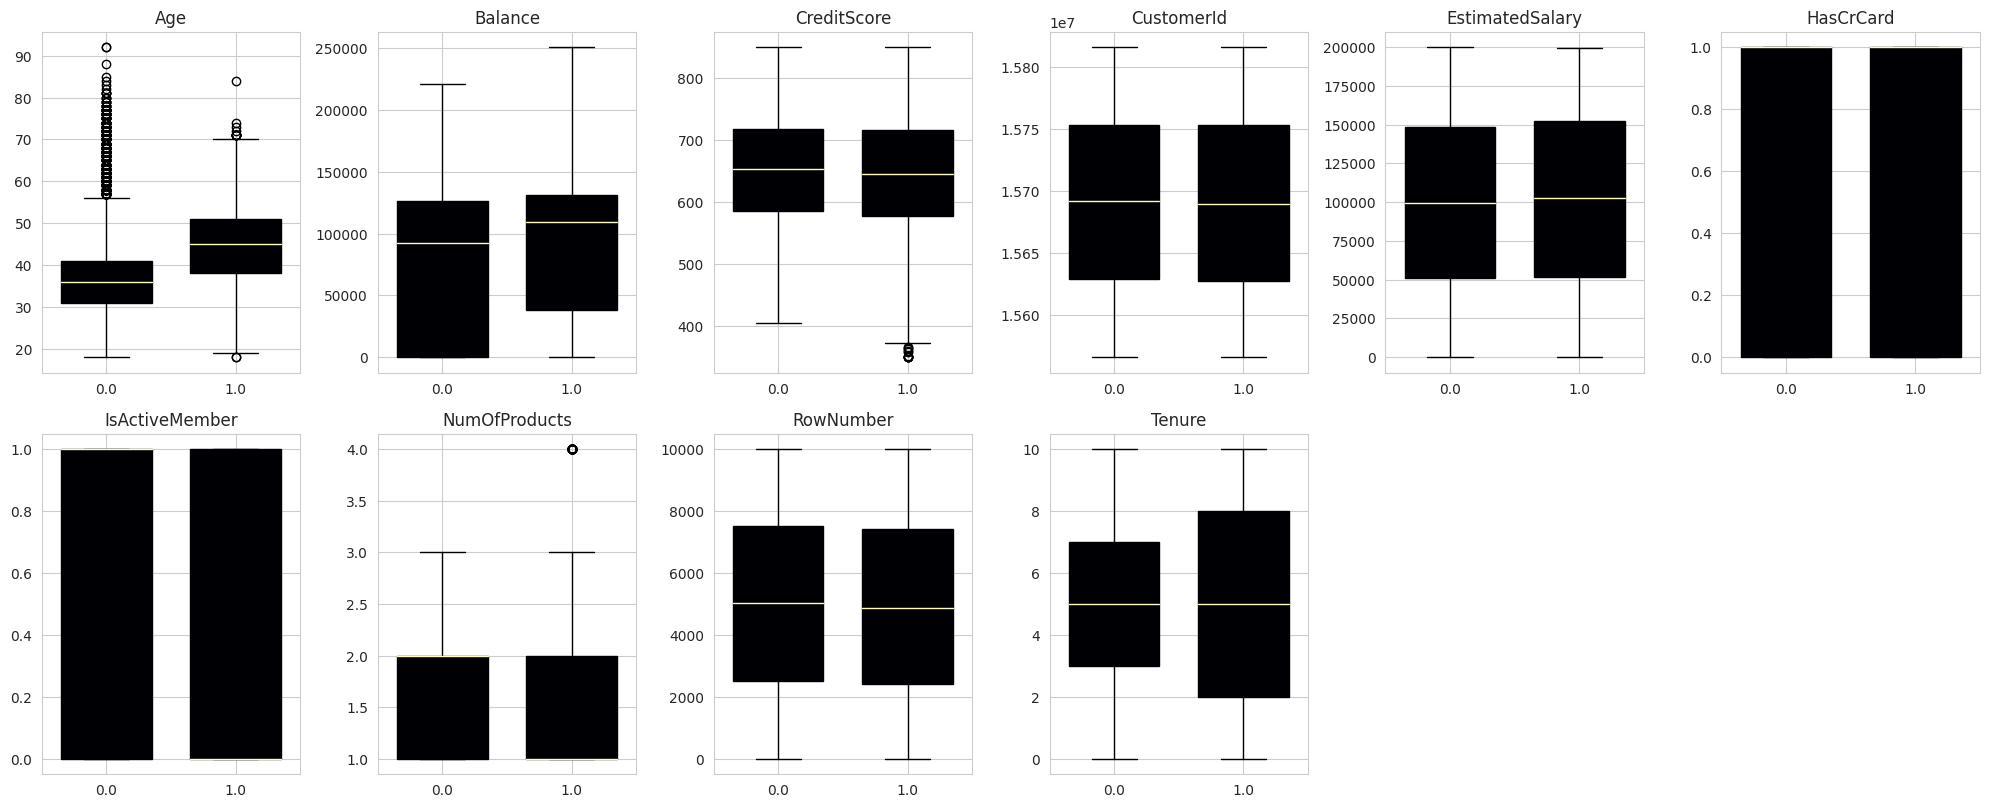

In [223]:
df.plot(kind="box",
        by="Exited", 
        layout=(5, 6), 
        subplots=True, 
        widths=0.7, 
        figsize=(20,20), 
        cmap="magma", 
        patch_artist=True)
plt.tight_layout();

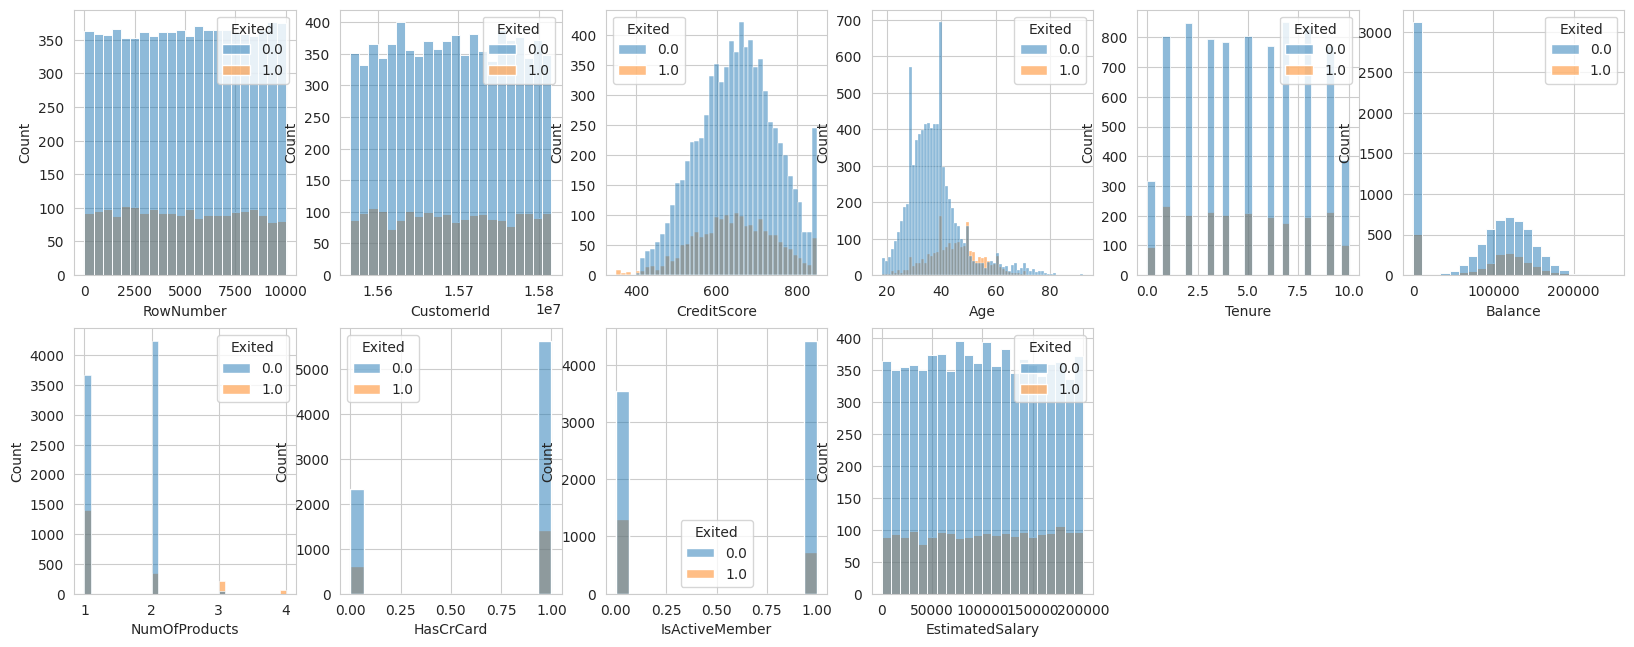

In [224]:
plt.figure(figsize=(20, 20))
for idx, col in enumerate(df.select_dtypes(include='number').columns[:-1]):
    plt.subplot(5, 6, idx+1)
    sns.histplot(data=df, x=col, hue='Exited')

In [ ]:
pd.__version__

'1.5.3'

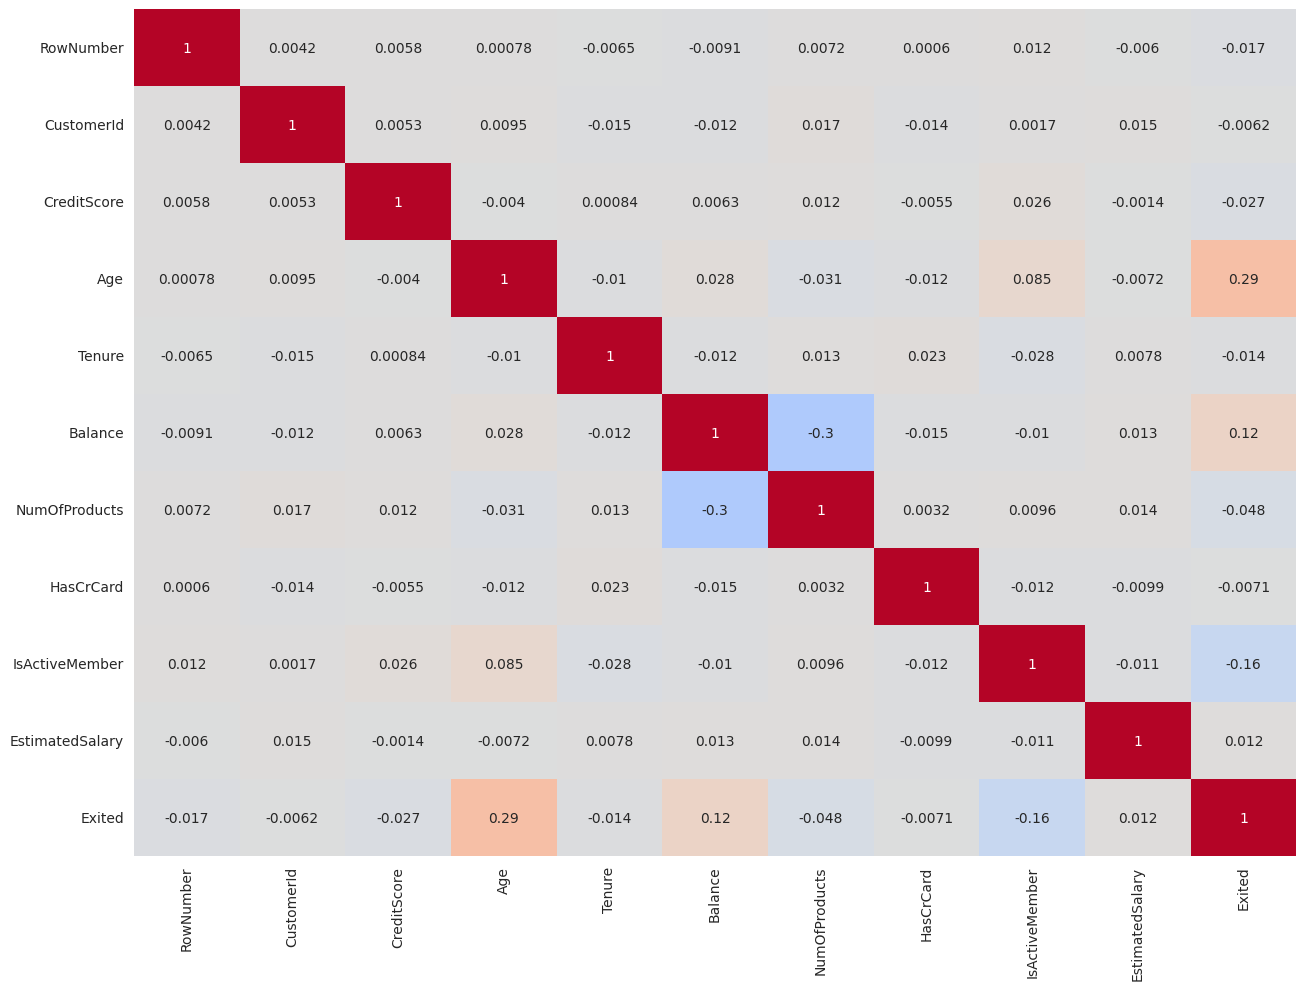

In [225]:
plt.figure(figsize=(15, 11))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm", cbar=False)
plt.show()

In [226]:
df_temp = df.corr()

feature =[]
collinear=[]

for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .85 and df_temp[col][i] < 1) or (df_temp[col][i]< -.85 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                print(Fore.RED + f"\033[1mmulticolinearity alert\033[0m between {col} - {i}")
        else:
            print(f"For {col} and {i}, there is \033[1mNO multicollinearity problem\033[0m") 

unique_list = list(set(feature+collinear))

print(colored('*'*80, 'cyan', attrs=['bold']))
print("\033[1mThe total number of strong corelated features:\033[0m", len(unique_list)) 

For RowNumber and RowNumber, there is NO multicollinearity problem
For RowNumber and CustomerId, there is NO multicollinearity problem
For RowNumber and CreditScore, there is NO multicollinearity problem
For RowNumber and Age, there is NO multicollinearity problem
For RowNumber and Tenure, there is NO multicollinearity problem
For RowNumber and Balance, there is NO multicollinearity problem
For RowNumber and NumOfProducts, there is NO multicollinearity problem
For RowNumber and HasCrCard, there is NO multicollinearity problem
For RowNumber and IsActiveMember, there is NO multicollinearity problem
For RowNumber and EstimatedSalary, there is NO multicollinearity problem
For RowNumber and Exited, there is NO multicollinearity problem
For CustomerId and RowNumber, there is NO multicollinearity problem
For CustomerId and CustomerId, there is NO multicollinearity problem
For CustomerId and CreditScore, there is NO multicollinearity problem
For CustomerId and Age, there is NO multicollinearit

In [227]:
drop_list = ["RowNumber", "CustomerId","Surname"]

In [228]:
df.shape

(10000, 14)

In [229]:
df = df.drop(drop_list, axis=1).copy()

In [230]:
df.shape

(10000, 11)

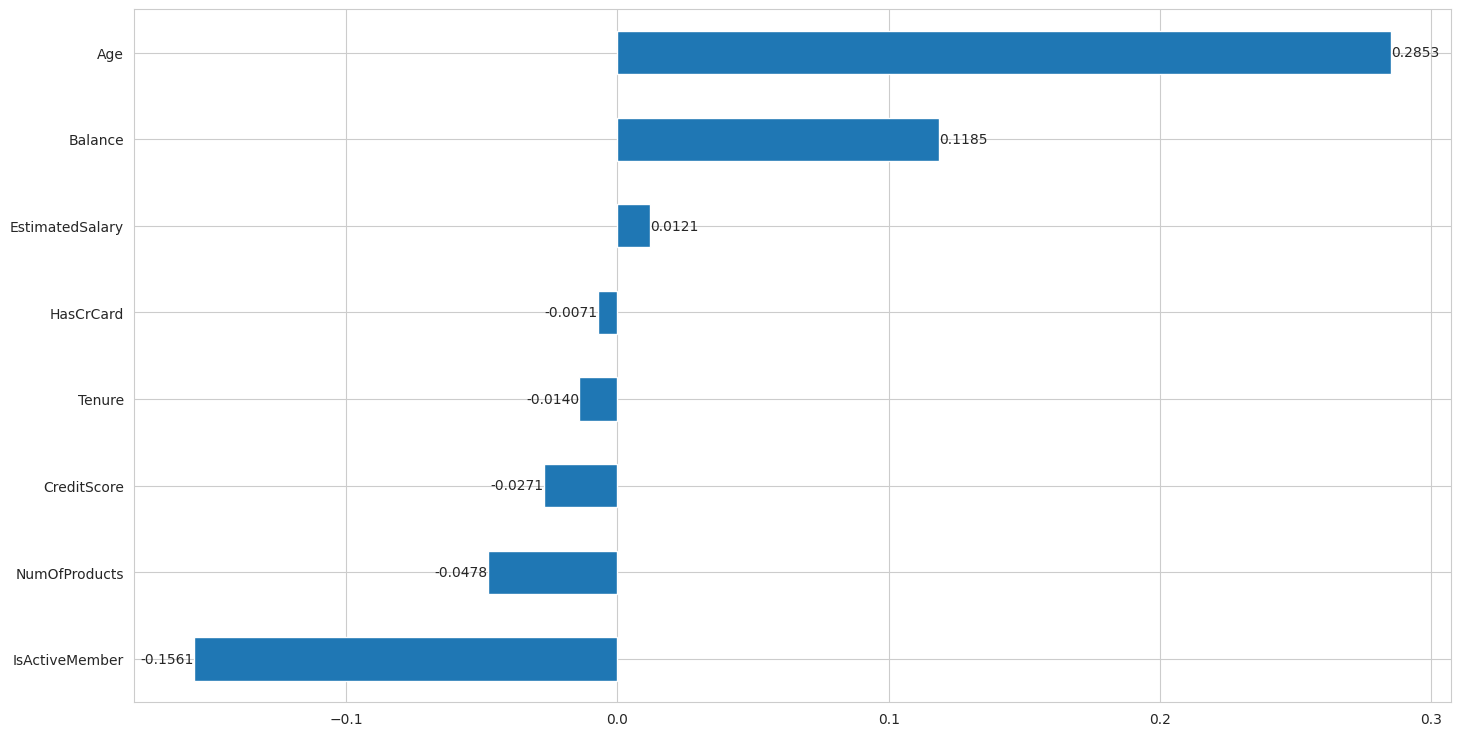

In [232]:
plt.figure(figsize=(17, 9))
ax = df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.4f")
plt.show()

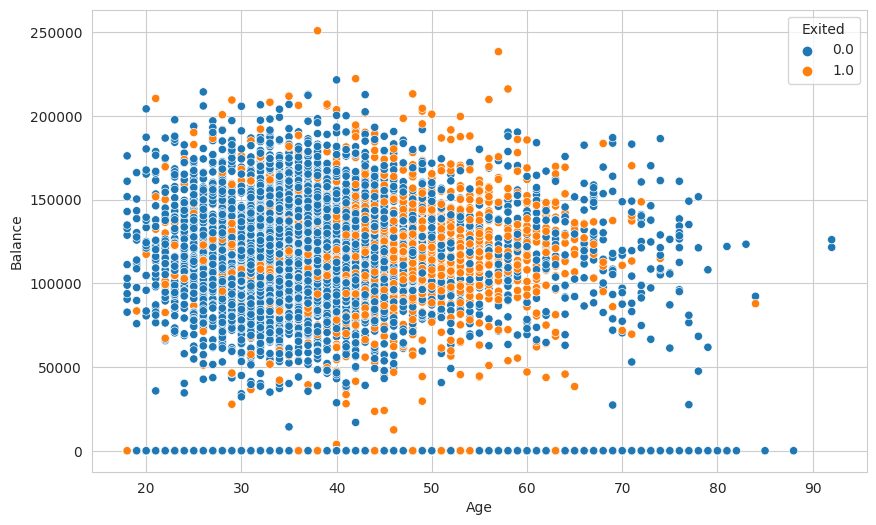

In [233]:

sns.scatterplot(data=df, x="Age", y="Balance", hue="Exited");

In [234]:
# Let's take a quick look at Target variable

first_look('Exited')

column name    :  Exited
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
0.000    7963
1.000    2037
Name: Exited, dtype: int64


Percentage of "being churn": % 20.37 --> (2037 churn cases out of 10000)
Percentage of "NOT being churn": % 79.63 --> (7963 NOT churn cases out of 10000)


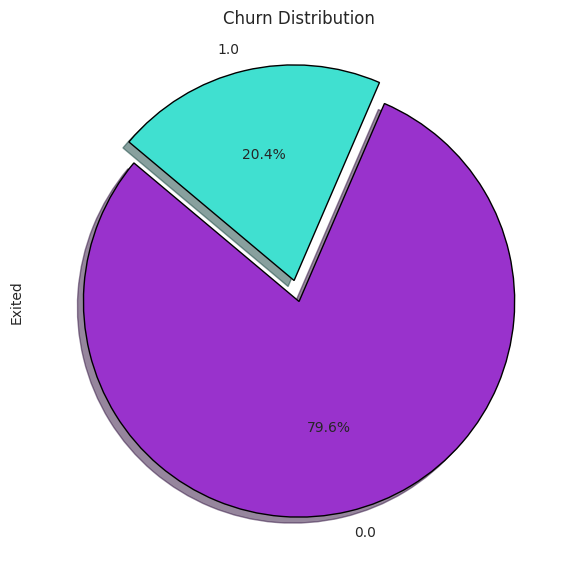

In [235]:
y = df['Exited']

print(f'Percentage of \033[1m"being churn"\033[0m: % {round(y.value_counts(normalize=True)[1]*100,2)} --> \
({y.value_counts()[1]} churn cases out of {len(df)})\nPercentage of \033[1m"NOT being churn"\033[0m: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} NOT churn cases out of {len(df)})')

explode = [0, 0.1]

df["Exited"].value_counts().plot(kind="pie", 
                                 autopct='%1.1f%%', 
                                 figsize=(7, 7), 
                                 explode=explode, 
                                 wedgeprops={'edgecolor': 'black'}, 
                                 shadow=True, 
                                 colors = ['darkorchid', 'turquoise'], 
                                 startangle=140)
plt.title('Churn Distribution');

In [236]:
df[df['Exited']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')


,count,mean,std,min,25%,50%,75%,max
CreditScore,7963.00,651.85,95.65,405.00,585.00,653.00,718.00,850.00
Age,7963.00,37.41,10.13,18.00,31.00,36.00,41.00,92.00
Tenure,7963.00,5.03,2.88,0.00,3.00,5.00,7.00,10.00
Balance,7963.00,72745.30,62848.04,0.00,0.00,92072.68,126410.28,221532.80
NumOfProducts,7963.00,1.54,0.51,1.00,1.00,2.00,2.00,3.00
HasCrCard,7963.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,7963.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,7963.00,99738.39,57405.59,90.07,50783.49,99645.04,148609.96,199992.48
Exited,7963.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [237]:
df[df['Exited']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')


,count,mean,std,min,25%,50%,75%,max
CreditScore,2037.00,645.35,100.32,350.00,578.00,646.00,716.00,850.00
Age,2037.00,44.84,9.76,18.00,38.00,45.00,51.00,84.00
Tenure,2037.00,4.93,2.94,0.00,2.00,5.00,8.00,10.00
Balance,2037.00,91108.54,58360.79,0.00,38340.02,109349.29,131433.33,250898.09
NumOfProducts,2037.00,1.48,0.80,1.00,1.00,1.00,2.00,4.00
HasCrCard,2037.00,0.70,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,2037.00,0.36,0.48,0.00,0.00,0.00,1.00,1.00
EstimatedSalary,2037.00,101465.68,57912.42,11.58,51907.72,102460.84,152422.91,199808.10
Exited,2037.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00


In [238]:
print( f"Skewness: {df['Exited'].skew()}")

Skewness: 1.4716106649378211


In [239]:
numerical= df.drop(['Exited'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(colored("Numerical Columns:", attrs=['bold']), list(df[numerical].columns),'\n',
              colored('-'*124, 'red', attrs=['bold']), sep='')
print(colored("Categorical Columns:", attrs=['bold']), list(df[categorical].columns),'\n',
              colored('-'*124, 'red', attrs=['bold']), sep='')

Numerical Columns:['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
----------------------------------------------------------------------------------------------------------------------------
Categorical Columns:['Geography', 'Gender']
----------------------------------------------------------------------------------------------------------------------------


In [240]:
df[numerical].head().T

,0,1,2,3,4
CreditScore,619.000,608.000,502.000,699.000,850.000
Age,42.000,41.000,42.000,39.000,43.000
Tenure,2.000,1.000,8.000,1.000,2.000
Balance,0.000,83807.860,159660.800,0.000,125510.820
NumOfProducts,1.000,1.000,3.000,2.000,1.000
HasCrCard,1.000,0.000,1.000,0.000,1.000
IsActiveMember,1.000,1.000,0.000,0.000,1.000
EstimatedSalary,101348.880,112542.580,113931.570,93826.630,79084.100


In [241]:
df[categorical].head().T

,0,1,2,3,4
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female


In [242]:
df["Gender"] = df.Gender.map({
    "Male": 1,
    "Female": 0
})

In [243]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [244]:
df["Geography"] = df.Geography.map({
    "France": 1,
    "Germany": 2,
    "Spain" : 3
})

In [245]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.000,1,0,42.000,2.000,0.000,1.000,1.000,1.000,101348.880,1.000
1,608.000,3,0,41.000,1.000,83807.860,1.000,0.000,1.000,112542.580,0.000
2,502.000,1,0,42.000,8.000,159660.800,3.000,1.000,0.000,113931.570,1.000
3,699.000,1,0,39.000,1.000,0.000,2.000,0.000,0.000,93826.630,0.000
4,850.000,3,0,43.000,2.000,125510.820,1.000,1.000,1.000,79084.100,0.000


# Preprocessing of Data
- Train | Test Split, Scalling

In [246]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [247]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [248]:
seed = 1

In [249]:
scaler = MinMaxScaler()

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,stratify=y, random_state=seed)



In [251]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [252]:
X_train1, X_test, y_train1, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=seed 
)

# classların dağılımının oranını göz önünde bulundurarak bu train datasını ve test datasını ayırdık.

X_train, X_val, y_train, y_val = train_test_split(
    X_train1, y_train1, stratify=y_train1, test_size=0.1, random_state=seed 
)


In [253]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [254]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [255]:
X_train.shape

(8100, 10)

In [256]:
X_val.shape

(900, 10)

In [257]:
X_test.shape

(1000, 10)

## without class_weigth

### Create The Model

In [260]:
model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer. 
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [261]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 36)                396       
                                                                 
 dense_36 (Dense)            (None, 18)                666       
                                                                 
 dense_37 (Dense)            (None, 9)                 171       
                                                                 
 dense_38 (Dense)            (None, 1)                 10        
                                                                 
Total params: 1,243
Trainable params: 1,243
Non-trainable params: 0
_________________________________________________________________


In [262]:
model.weights

[<tf.Variable 'dense_35/kernel:0' shape=(10, 36) dtype=float32, numpy=
 array([[-0.32544345, -0.02060446, -0.2836547 ,  0.2648556 , -0.251013  ,
         -0.0825949 ,  0.3315275 , -0.04044077,  0.00991794, -0.03207868,
         -0.34982842,  0.06601128, -0.15050112, -0.06937701,  0.32942572,
         -0.31609562,  0.22907707,  0.33516094, -0.31630373,  0.0437949 ,
         -0.22859298, -0.33476114,  0.16442284,  0.18204287, -0.01188514,
          0.19617572,  0.07764918,  0.23113444, -0.21315561, -0.34990188,
         -0.13455038,  0.25168023, -0.01798105, -0.05241925,  0.3466995 ,
          0.33850697],
        [-0.23504427, -0.04962999,  0.13578695, -0.07340473,  0.06352174,
          0.06202099, -0.07179695, -0.02162611, -0.2696775 , -0.19242612,
         -0.07104284, -0.1567423 ,  0.18313572,  0.19059685,  0.35546806,
         -0.2671357 , -0.22372235, -0.32267994,  0.25554672, -0.11748886,
          0.2453436 , -0.35883364, -0.10470822,  0.30281386,  0.09194282,
         -0.009385

In [263]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size=32, 
          epochs=600,
          verbose=1)

Epoch 1/600
254/254 [==============================] - 1s 2ms/step - loss: 0.5019 - recall: 0.0121 - val_loss: 0.4586 - val_recall: 0.0000e+00
Epoch 2/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4538 - recall: 0.0218 - val_loss: 0.4355 - val_recall: 0.0656
Epoch 3/600
254/254 [==============================] - 0s 1ms/step - loss: 0.4287 - recall: 0.1533 - val_loss: 0.4126 - val_recall: 0.1749
Epoch 4/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4088 - recall: 0.2418 - val_loss: 0.3976 - val_recall: 0.2131
Epoch 5/600
254/254 [==============================] - 0s 1ms/step - loss: 0.3882 - recall: 0.2994 - val_loss: 0.3884 - val_recall: 0.2404
Epoch 6/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3737 - recall: 0.3630 - val_loss: 0.3763 - val_recall: 0.3060
Epoch 7/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3645 - recall: 0.3812 - val_loss: 0.3768 - val_recall: 0.3060
Epoch 8/600
254/254 [==

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
228/228 [==============================] - 1s 2ms/step - loss: 0.5191 - accuracy: 0.7761 - val_loss: 0.4831 - val_accuracy: 0.7827
Epoch 2/1000
228/228 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.7992 - val_loss: 0.4505 - val_accuracy: 0.7951
Epoch 3/1000
228/228 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.8144 - val_loss: 0.4158 - val_accuracy: 0.8123
Epoch 4/1000
228/228 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8269 - val_loss: 0.3974 - val_accuracy: 0.8198
Epoch 5/1000
228/228 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8401 - val_loss: 0.3817 - val_accuracy: 0.8346
Epoch 6/1000
228/228 [==============================] - 0s 1ms/step - loss: 0.3717 - accuracy: 0.8479 - val_loss: 0.3735 - val_accuracy: 0.8346
Epoch 7/1000
228/228 [==============================] - 0s 2ms/step - loss: 0.3624 - accuracy: 0.8521 - val_loss: 0.3662 - val_accuracy:

In [264]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.502,0.012,0.459,0.000
1,0.454,0.022,0.436,0.066
2,0.429,0.153,0.413,0.175
3,0.409,0.242,0.398,0.213
4,0.388,0.299,0.388,0.240


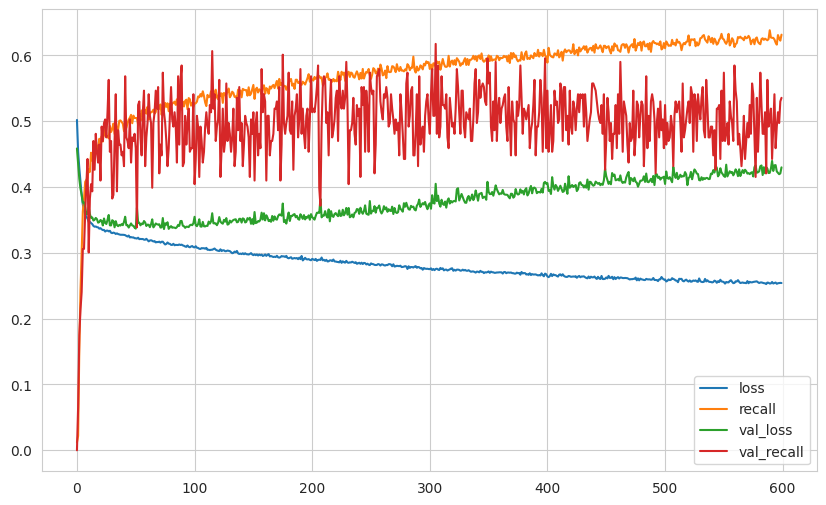

In [265]:
loss_df.plot();

In [267]:
model.evaluate(X_test, y_test, verbose=0)

[0.4389807879924774, 0.5147058963775635]

In [268]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 887us/step
[[728  68]
 [ 99 105]]
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90       796
         1.0       0.61      0.51      0.56       204

    accuracy                           0.83      1000
   macro avg       0.74      0.71      0.73      1000
weighted avg       0.82      0.83      0.83      1000



Early Stoping

In [269]:
tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [271]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [272]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
)



Epoch 1/600
254/254 [==============================] - 1s 2ms/step - loss: 0.5009 - accuracy: 0.7851 - val_loss: 0.4592 - val_accuracy: 0.7989
Epoch 2/600
254/254 [==============================] - 0s 1ms/step - loss: 0.4503 - accuracy: 0.8053 - val_loss: 0.4348 - val_accuracy: 0.8167
Epoch 3/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.8183 - val_loss: 0.4036 - val_accuracy: 0.8311
Epoch 4/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8335 - val_loss: 0.3899 - val_accuracy: 0.8367
Epoch 5/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8448 - val_loss: 0.3815 - val_accuracy: 0.8411
Epoch 6/600
254/254 [==============================] - 0s 1ms/step - loss: 0.3645 - accuracy: 0.8505 - val_loss: 0.3727 - val_accuracy: 0.8422
Epoch 7/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8498 - val_loss: 0.3806 - val_accuracy: 0.8367

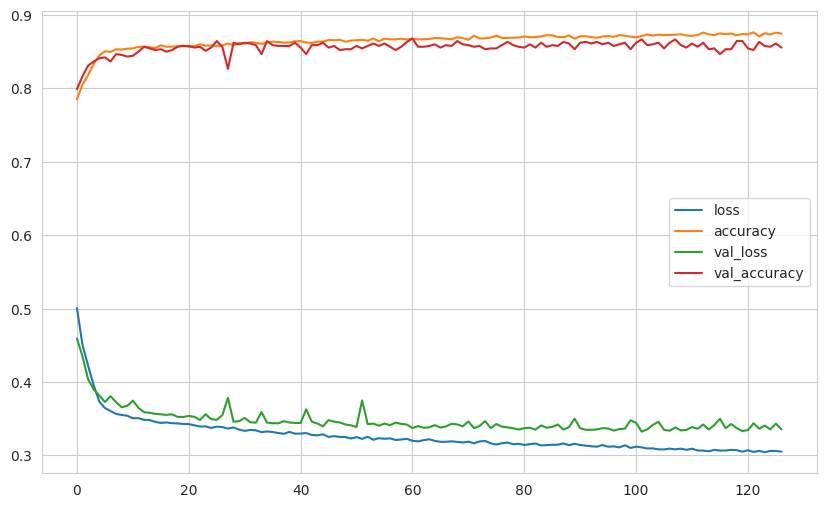

In [275]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [280]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.35190659761428833
recall :  0.8619999885559082


In [281]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 952us/step
[[770  26]
 [112  92]]
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92       796
         1.0       0.78      0.45      0.57       204

    accuracy                           0.86      1000
   macro avg       0.83      0.71      0.74      1000
weighted avg       0.85      0.86      0.85      1000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
!pip install scikit_learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn
sklearn.__version__

'1.2.2'

In [ ]:
from sklearn import datasets, metrics, model_selection

In [ ]:
metrics.roc_auc_score

32/32 [==============================] - 0s 900us/step


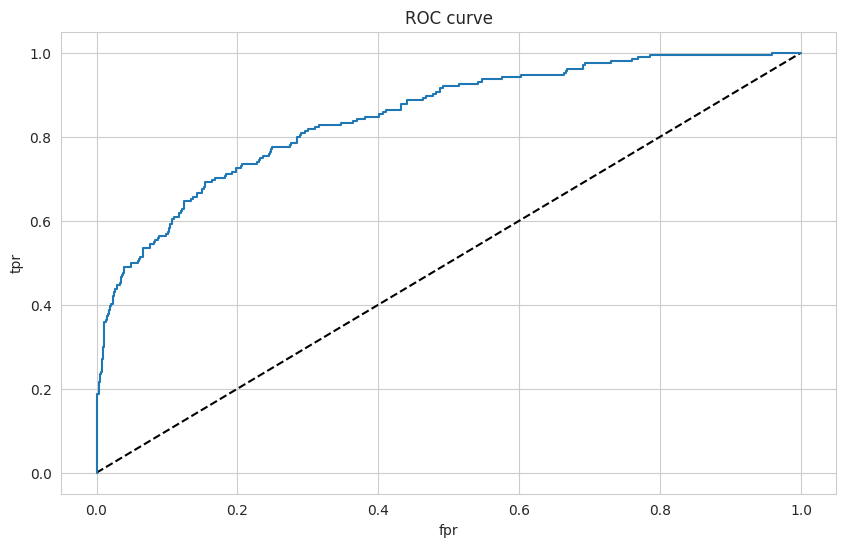

In [282]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [283]:
roc_auc_score(y_test, y_pred_proba)

0.8473063848655039

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [284]:
from sklearn.utils import class_weight

### Create The Model

In [287]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [288]:
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights                                              

{0: 0.627906976744186, 1: 2.4545454545454546}

In [289]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size= 75, 
          epochs=600,
          verbose=1,
         class_weight=class_weights
         )

Epoch 1/600
108/108 [==============================] - 1s 3ms/step - loss: 0.6862 - recall: 0.3285 - val_loss: 0.6606 - val_recall: 0.6557
Epoch 2/600
108/108 [==============================] - 0s 2ms/step - loss: 0.6599 - recall: 0.5970 - val_loss: 0.6437 - val_recall: 0.6940
Epoch 3/600
108/108 [==============================] - 0s 2ms/step - loss: 0.6370 - recall: 0.6545 - val_loss: 0.6230 - val_recall: 0.7322
Epoch 4/600
108/108 [==============================] - 0s 2ms/step - loss: 0.6167 - recall: 0.6830 - val_loss: 0.6266 - val_recall: 0.7814
Epoch 5/600
108/108 [==============================] - 0s 2ms/step - loss: 0.6035 - recall: 0.6855 - val_loss: 0.6147 - val_recall: 0.7814
Epoch 6/600
108/108 [==============================] - 0s 2ms/step - loss: 0.5928 - recall: 0.7000 - val_loss: 0.5855 - val_recall: 0.7104
Epoch 7/600
108/108 [==============================] - 0s 2ms/step - loss: 0.5896 - recall: 0.6970 - val_loss: 0.5698 - val_recall: 0.6940
Epoch 8/600
108/108 [======

In [290]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.686,0.328,0.661,0.656
1,0.660,0.597,0.644,0.694
2,0.637,0.655,0.623,0.732
3,0.617,0.683,0.627,0.781
4,0.604,0.685,0.615,0.781


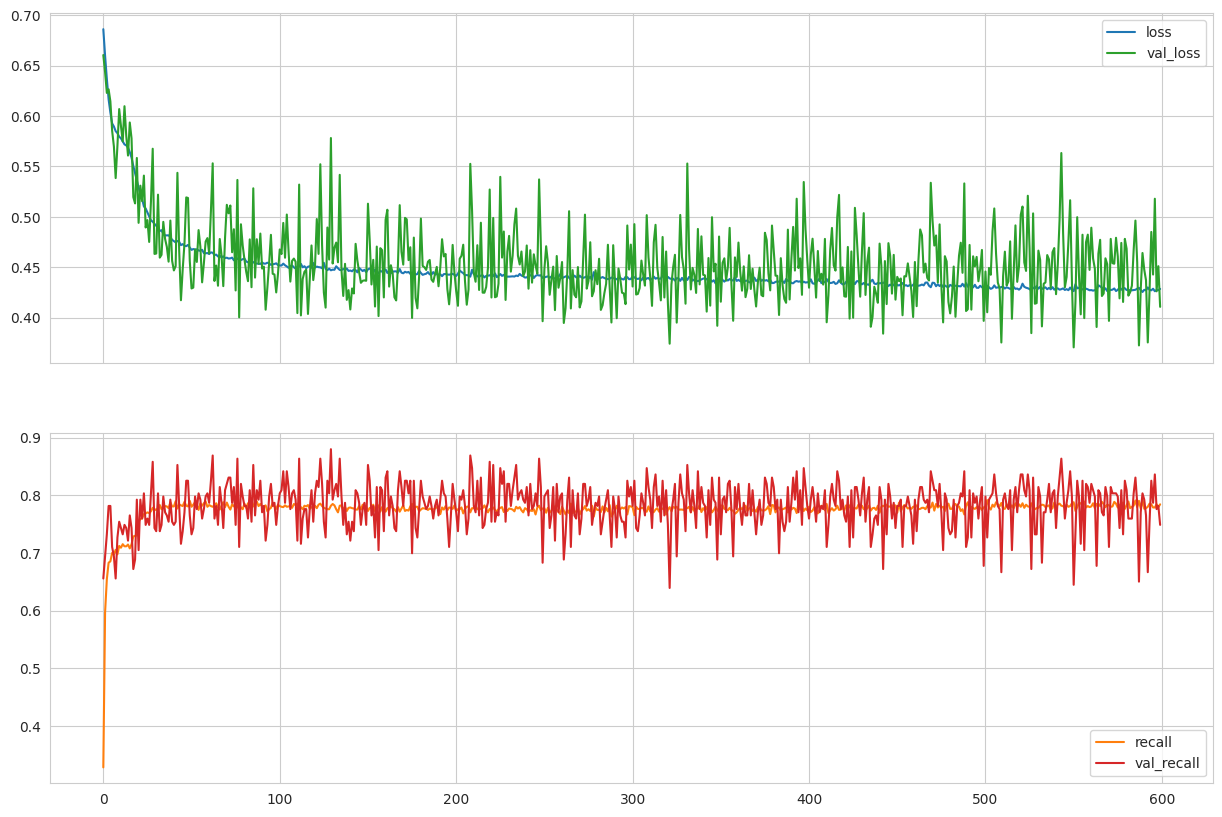

In [291]:
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(15,10))
plt.show()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [292]:
model.evaluate(X_test, y_test, verbose=0)

[0.42482060194015503, 0.6470588445663452]

In [294]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.42482060194015503
recall :  0.6470588445663452


In [295]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[671 125]
 [ 72 132]]
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87       796
         1.0       0.51      0.65      0.57       204

    accuracy                           0.80      1000
   macro avg       0.71      0.75      0.72      1000
weighted avg       0.82      0.80      0.81      1000



32/32 [==============================] - 0s 1ms/step


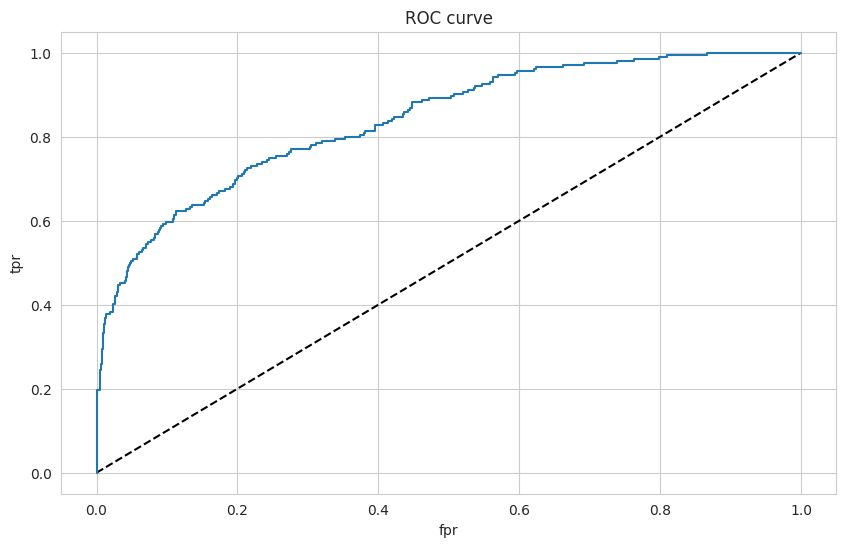

In [297]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [298]:
from tensorflow.keras.optimizers import Adam


In [299]:
tf.keras.utils.set_random_seed(42)


model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=  0.003)

In [300]:
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [301]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size= 75, 
          epochs=600,
          verbose=1)

Epoch 1/600
108/108 [==============================] - 1s 3ms/step - loss: 0.6030 - recall: 0.1079 - val_loss: 0.4911 - val_recall: 0.0000e+00
Epoch 2/600
108/108 [==============================] - 0s 2ms/step - loss: 0.4799 - recall: 0.0000e+00 - val_loss: 0.4592 - val_recall: 0.0109
Epoch 3/600
108/108 [==============================] - 0s 2ms/step - loss: 0.4564 - recall: 0.0376 - val_loss: 0.4391 - val_recall: 0.1803
Epoch 4/600
108/108 [==============================] - 0s 2ms/step - loss: 0.4420 - recall: 0.1339 - val_loss: 0.4260 - val_recall: 0.1585
Epoch 5/600
108/108 [==============================] - 0s 2ms/step - loss: 0.4342 - recall: 0.1848 - val_loss: 0.4199 - val_recall: 0.3333
Epoch 6/600
108/108 [==============================] - 0s 2ms/step - loss: 0.4196 - recall: 0.2242 - val_loss: 0.4044 - val_recall: 0.2787
Epoch 7/600
108/108 [==============================] - 0s 2ms/step - loss: 0.4100 - recall: 0.2788 - val_loss: 0.3951 - val_recall: 0.2842
Epoch 8/600
108/108

In [302]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.603,0.108,0.491,0.000
1,0.480,0.000,0.459,0.011
2,0.456,0.038,0.439,0.180
3,0.442,0.134,0.426,0.158
4,0.434,0.185,0.420,0.333


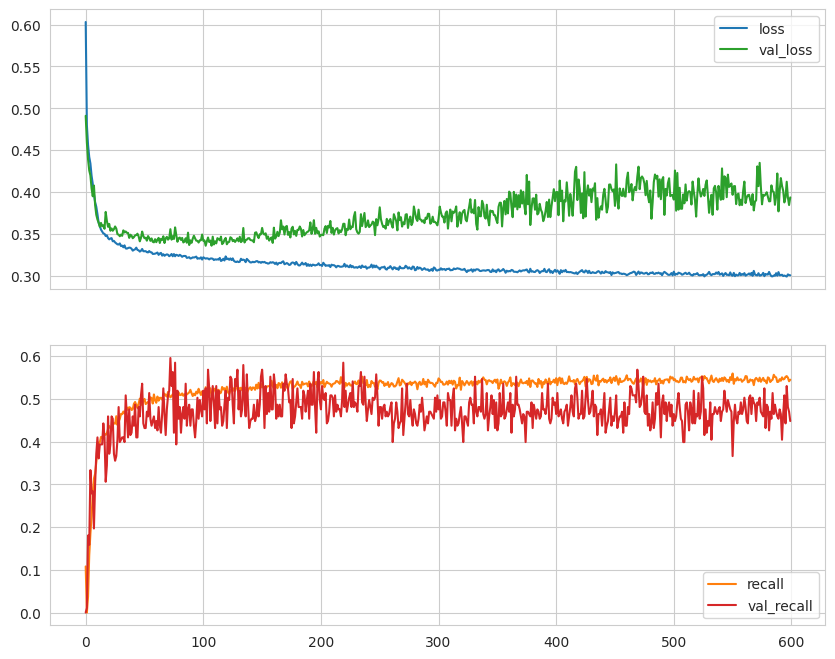

In [303]:
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(10,8))
plt.show()

In [304]:
model.evaluate(X_test, y_test, verbose=0)

[0.3753424286842346, 0.45098039507865906]

In [305]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3753424286842346
recall :  0.45098039507865906


In [307]:

y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[763  33]
 [112  92]]
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       796
         1.0       0.74      0.45      0.56       204

    accuracy                           0.85      1000
   macro avg       0.80      0.70      0.74      1000
weighted avg       0.84      0.85      0.84      1000



### Add Dropout Layer

In [306]:
from tensorflow.keras.layers import Dropout

In [308]:
tf.keras.utils.set_random_seed(42)

model = Sequential()

model.add(Dense(18, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(4, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.002)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [310]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size= 75, 
          epochs=600,
          verbose=1)

Epoch 1/600
108/108 [==============================] - 0s 3ms/step - loss: 0.4225 - recall: 0.2527 - val_loss: 0.3961 - val_recall: 0.2787
Epoch 2/600
108/108 [==============================] - 0s 2ms/step - loss: 0.4206 - recall: 0.2333 - val_loss: 0.3843 - val_recall: 0.3224
Epoch 3/600
108/108 [==============================] - 0s 2ms/step - loss: 0.4173 - recall: 0.2661 - val_loss: 0.3832 - val_recall: 0.3060
Epoch 4/600
108/108 [==============================] - 0s 2ms/step - loss: 0.4129 - recall: 0.2491 - val_loss: 0.3818 - val_recall: 0.3005
Epoch 5/600
108/108 [==============================] - 0s 2ms/step - loss: 0.4124 - recall: 0.2600 - val_loss: 0.3809 - val_recall: 0.3333
Epoch 6/600
108/108 [==============================] - 0s 2ms/step - loss: 0.4161 - recall: 0.2418 - val_loss: 0.3822 - val_recall: 0.2732
Epoch 7/600
108/108 [==============================] - 0s 2ms/step - loss: 0.4144 - recall: 0.2352 - val_loss: 0.3754 - val_recall: 0.3333
Epoch 8/600
108/108 [======

In [311]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.423,0.253,0.396,0.279
1,0.421,0.233,0.384,0.322
2,0.417,0.266,0.383,0.306
3,0.413,0.249,0.382,0.301
4,0.412,0.260,0.381,0.333


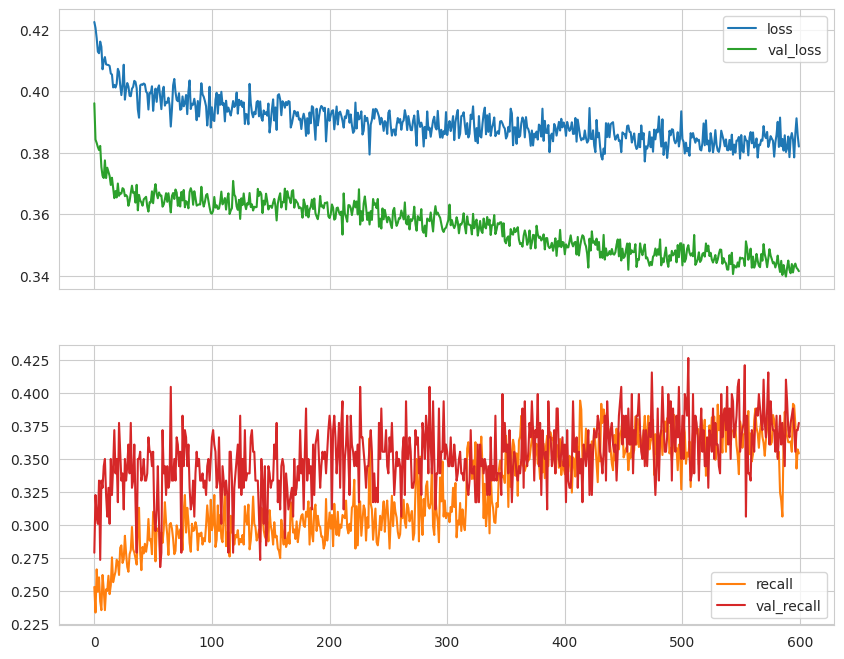

In [312]:
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(10,8))
plt.show()

In [313]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3555358350276947
recall :  0.4215686321258545


In [314]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 4ms/step
[[783  13]
 [118  86]]
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       796
         1.0       0.87      0.42      0.57       204

    accuracy                           0.87      1000
   macro avg       0.87      0.70      0.75      1000
weighted avg       0.87      0.87      0.85      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [315]:
from tensorflow.keras.callbacks import EarlyStopping

In [316]:
early_stop = EarlyStopping(monitor = "val_loss", 
                           mode = "min", 
                           verbose = 1, 
                           patience = 15, 
                           restore_best_weights = True)

In [317]:
tf.keras.utils.set_random_seed(42)

model = Sequential()

model.add(Dense(18, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [318]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=75,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights    
)

Epoch 1/600
108/108 [==============================] - 1s 3ms/step - loss: 0.6885 - recall: 0.9467 - val_loss: 0.7094 - val_recall: 0.9016
Epoch 2/600
108/108 [==============================] - 0s 2ms/step - loss: 0.6652 - recall: 0.7739 - val_loss: 0.6956 - val_recall: 0.7705
Epoch 3/600
108/108 [==============================] - 0s 2ms/step - loss: 0.6334 - recall: 0.6885 - val_loss: 0.6135 - val_recall: 0.6721
Epoch 4/600
108/108 [==============================] - 0s 2ms/step - loss: 0.6081 - recall: 0.6697 - val_loss: 0.6192 - val_recall: 0.7322
Epoch 5/600
108/108 [==============================] - 0s 2ms/step - loss: 0.5905 - recall: 0.6824 - val_loss: 0.5986 - val_recall: 0.7268
Epoch 6/600
108/108 [==============================] - 0s 2ms/step - loss: 0.5733 - recall: 0.7000 - val_loss: 0.5758 - val_recall: 0.7104
Epoch 7/600
108/108 [==============================] - 0s 2ms/step - loss: 0.5620 - recall: 0.7097 - val_loss: 0.5475 - val_recall: 0.7049
Epoch 8/600
108/108 [======

In [319]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.688,0.947,0.709,0.902
1,0.665,0.774,0.696,0.770
2,0.633,0.688,0.613,0.672
3,0.608,0.670,0.619,0.732
4,0.590,0.682,0.599,0.727


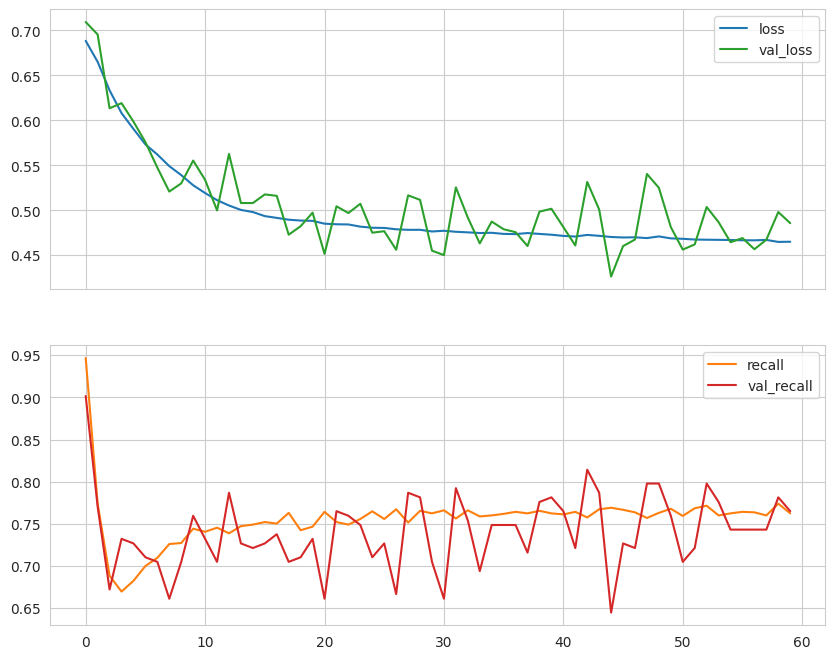

In [320]:
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(10,8))
plt.show()

In [321]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.42233577370643616
recall :  0.6274510025978088


In [322]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 940us/step
[[680 116]
 [ 76 128]]
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88       796
         1.0       0.52      0.63      0.57       204

    accuracy                           0.81      1000
   macro avg       0.71      0.74      0.72      1000
weighted avg       0.82      0.81      0.81      1000



#### Monitor the "val_recall" as metric

In [323]:
early_stop = EarlyStopping(monitor = "val_recall", 
                           mode = "min", 
                           verbose = 1, 
                           patience = 15, 
                           restore_best_weights = True)

In [324]:
tf.keras.utils.set_random_seed(42)

model = Sequential()

model.add(Dense(18, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [325]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=75,
    epochs=500,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights    
)

Epoch 1/500
108/108 [==============================] - 1s 3ms/step - loss: 0.6885 - recall: 0.9467 - val_loss: 0.7094 - val_recall: 0.9016
Epoch 2/500
108/108 [==============================] - 0s 2ms/step - loss: 0.6652 - recall: 0.7739 - val_loss: 0.6956 - val_recall: 0.7705
Epoch 3/500
108/108 [==============================] - 0s 2ms/step - loss: 0.6334 - recall: 0.6885 - val_loss: 0.6135 - val_recall: 0.6721
Epoch 4/500
108/108 [==============================] - 0s 2ms/step - loss: 0.6081 - recall: 0.6697 - val_loss: 0.6192 - val_recall: 0.7322
Epoch 5/500
108/108 [==============================] - 0s 2ms/step - loss: 0.5905 - recall: 0.6824 - val_loss: 0.5986 - val_recall: 0.7268
Epoch 6/500
108/108 [==============================] - 0s 2ms/step - loss: 0.5733 - recall: 0.7000 - val_loss: 0.5758 - val_recall: 0.7104
Epoch 7/500
108/108 [==============================] - 0s 2ms/step - loss: 0.5620 - recall: 0.7097 - val_loss: 0.5475 - val_recall: 0.7049
Epoch 8/500
108/108 [======

In [326]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.688,0.947,0.709,0.902
1,0.665,0.774,0.696,0.770
2,0.633,0.688,0.613,0.672
3,0.608,0.670,0.619,0.732
4,0.590,0.682,0.599,0.727


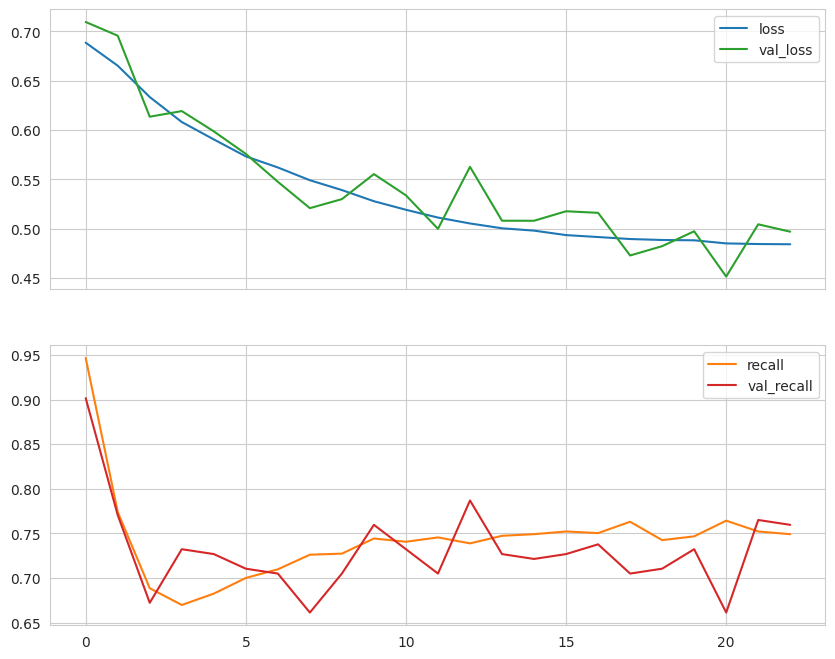

In [327]:
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(10,8))
plt.show()

In [330]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.5127308964729309
recall :  0.6470588445663452


In [331]:

y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[616 180]
 [ 72 132]]
              precision    recall  f1-score   support

         0.0       0.90      0.77      0.83       796
         1.0       0.42      0.65      0.51       204

    accuracy                           0.75      1000
   macro avg       0.66      0.71      0.67      1000
weighted avg       0.80      0.75      0.77      1000



## Optuna

In [329]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [333]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.3/224.3 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.9 MB/s eta 0:00:00


In [334]:
import optuna
from tensorflow.keras.regularizers import l1, l2, L1L2

In [352]:
early_stop = EarlyStopping(monitor = "val_recall", 
                           mode = "min", 
                           verbose = 1, 
                           patience = 25, 
                           restore_best_weights = True)

In [353]:
trial_metric = "Recall"
batch_size = 64

In [354]:
def create_model(trial):
    
    n_units1 = trial.suggest_int("n_units1", 64, 128) 
    n_units2 = trial.suggest_int("n_units2", 16, 64)  
    n_units3 = trial.suggest_int("n_units3", 16, 64)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam]) 
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1) 
    regularizer1 = trial.suggest_loguniform("regularizer1", 1e-5, 1e-3)
    regularizer2 = trial.suggest_loguniform("regularizer2", 1e-5, 1e-3)
    dropout = trial.suggest_categorical("dropout",[0, .3, .5])
    
    

    tf.keras.utils.set_random_seed(42)
    model = Sequential()
    model.add(Dense(n_units1,  
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2), 
                    input_dim=X_train.shape[1],))
    model.add(Dropout(dropout))
    model.add(Dense(n_units2, 
                    activation="relu",  
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(n_units3,
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2),
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))
   



    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric]
    )
    
    
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5) 
    w1 = trial.suggest_loguniform("w1", 0.01, 2) 
                                                 
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=700,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    return model.evaluate(X_test, y_test, verbose=0)[1]

In [355]:
study = optuna.create_study(direction="maximize") 
study.optimize(objective  , n_trials=15) 
display(study.best_params)

[I 2023-05-17 18:53:33,188] A new study created in memory with name: no-name-3fb20a6c-b26a-4e4f-93ce-a707881eb239


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 18:53:42,099] Trial 0 finished with value: 1.0 and parameters: {'n_units1': 86, 'n_units2': 18, 'n_units3': 27, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 7.148554855902561e-05, 'regularizer1': 4.122526325007594e-05, 'regularizer2': 2.6030002985049172e-05, 'dropout': 0.5, 'w0': 0.08899584038861362, 'w1': 0.0124219331944552}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 18:53:53,703] Trial 1 finished with value: 0.0 and parameters: {'n_units1': 74, 'n_units2': 43, 'n_units3': 36, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.04029809339562859, 'regularizer1': 0.0006813242826113942, 'regularizer2': 0.00023317412900152035, 'dropout': 0.5, 'w0': 0.09703272984578205, 'w1': 0.03311825293017834}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 21.
Epoch 46: early stopping


[I 2023-05-17 18:54:15,469] Trial 2 finished with value: 0.0049019609577953815 and parameters: {'n_units1': 124, 'n_units2': 46, 'n_units3': 40, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.006302545341654548, 'regularizer1': 1.0281542809659639e-05, 'regularizer2': 3.7411953263737686e-05, 'dropout': 0.5, 'w0': 0.020233441625823873, 'w1': 0.014935540559153731}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 18:54:27,111] Trial 3 finished with value: 0.0 and parameters: {'n_units1': 71, 'n_units2': 39, 'n_units3': 40, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0014609434051863937, 'regularizer1': 2.856761927800685e-05, 'regularizer2': 0.0008060194306913281, 'dropout': 0.5, 'w0': 4.396548529998062, 'w1': 0.9731618271339554}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 9.
Epoch 34: early stopping


[I 2023-05-17 18:54:36,063] Trial 4 finished with value: 1.0 and parameters: {'n_units1': 66, 'n_units2': 35, 'n_units3': 21, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 9.873907725708905e-05, 'regularizer1': 0.0007808823100150154, 'regularizer2': 3.927696988088047e-05, 'dropout': 0, 'w0': 0.018376531345992864, 'w1': 0.025039884591914783}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 18:54:48,069] Trial 5 finished with value: 1.0 and parameters: {'n_units1': 72, 'n_units2': 53, 'n_units3': 46, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.04299356863195415, 'regularizer1': 0.00016947226857358153, 'regularizer2': 0.00011618208191534028, 'dropout': 0, 'w0': 0.014581952162813664, 'w1': 0.43949254963520096}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 18:55:00,124] Trial 6 finished with value: 0.0 and parameters: {'n_units1': 84, 'n_units2': 58, 'n_units3': 18, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.010250367571169388, 'regularizer1': 0.0008227939643848021, 'regularizer2': 1.0265194131455205e-05, 'dropout': 0.3, 'w0': 0.528126214639307, 'w1': 1.0411031833254887}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 18:55:11,688] Trial 7 finished with value: 0.9656862616539001 and parameters: {'n_units1': 116, 'n_units2': 49, 'n_units3': 37, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0028780536233865466, 'regularizer1': 1.788872261076312e-05, 'regularizer2': 0.00021221299434715906, 'dropout': 0.5, 'w0': 0.020054375724769084, 'w1': 1.1959902127277096}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 14.
Epoch 39: early stopping


[I 2023-05-17 18:55:34,345] Trial 8 finished with value: 0.6666666865348816 and parameters: {'n_units1': 105, 'n_units2': 18, 'n_units3': 45, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 3.472054565633125e-05, 'regularizer1': 7.570193060196612e-05, 'regularizer2': 0.0002964710336195341, 'dropout': 0.5, 'w0': 0.28536168406832685, 'w1': 1.167256978372853}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 13.
Epoch 38: early stopping


[I 2023-05-17 18:55:56,599] Trial 9 finished with value: 0.7843137383460999 and parameters: {'n_units1': 106, 'n_units2': 48, 'n_units3': 53, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 1.7659807258877632e-05, 'regularizer1': 2.0924807999489905e-05, 'regularizer2': 0.00023828382247509204, 'dropout': 0, 'w0': 0.27562388320302805, 'w1': 1.2907565211975531}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 18:56:03,922] Trial 10 finished with value: 0.0 and parameters: {'n_units1': 87, 'n_units2': 16, 'n_units3': 28, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00011837093151144515, 'regularizer1': 6.0485262605433216e-05, 'regularizer2': 1.0361713825838323e-05, 'dropout': 0.3, 'w0': 0.07070038219688105, 'w1': 0.07630168154800179}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 246.
Epoch 271: early stopping


[I 2023-05-17 18:57:27,088] Trial 11 finished with value: 0.3921568691730499 and parameters: {'n_units1': 65, 'n_units2': 30, 'n_units3': 16, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0002446983375569254, 'regularizer1': 0.00025218479920930846, 'regularizer2': 4.150082257296009e-05, 'dropout': 0, 'w0': 0.01033436276253363, 'w1': 0.012092946544930375}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-05-17 18:57:38,598] Trial 12 finished with value: 1.0 and parameters: {'n_units1': 89, 'n_units2': 28, 'n_units3': 27, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0003181804743701008, 'regularizer1': 0.00036662017641440843, 'regularizer2': 3.427553954524772e-05, 'dropout': 0, 'w0': 0.048844120443936934, 'w1': 0.03197381187580942}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 14.
Epoch 39: early stopping


[I 2023-05-17 18:57:49,336] Trial 13 finished with value: 0.8382353186607361 and parameters: {'n_units1': 97, 'n_units2': 28, 'n_units3': 26, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 5.7757847518128935e-05, 'regularizer1': 0.00012201480393589866, 'regularizer2': 2.546891877039018e-05, 'dropout': 0, 'w0': 0.0429137658164024, 'w1': 0.011062448018591653}. Best is trial 0 with value: 1.0.


Restoring model weights from the end of the best epoch: 141.
Epoch 166: early stopping


[I 2023-05-17 18:58:36,126] Trial 14 finished with value: 0.0049019609577953815 and parameters: {'n_units1': 83, 'n_units2': 36, 'n_units3': 62, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.000402211898914079, 'regularizer1': 4.958479355396296e-05, 'regularizer2': 7.114776185867667e-05, 'dropout': 0.3, 'w0': 0.10840974218984264, 'w1': 0.11100259997312775}. Best is trial 0 with value: 1.0.


{'n_units1': 86,
 'n_units2': 18,
 'n_units3': 27,
 'optimizer': keras.optimizers.adadelta.Adadelta,
 'learning_rate': 7.148554855902561e-05,
 'regularizer1': 4.122526325007594e-05,
 'regularizer2': 2.6030002985049172e-05,
 'dropout': 0.5,
 'w0': 0.08899584038861362,
 'w1': 0.0124219331944552}

In [342]:
unit1, unit2, unit3, optimizer, lr, lreg1, lreg2, dropout_rate, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["regularizer1"],
    study.best_params["regularizer2"],
    study.best_params["dropout"],
    study.best_params["w0"],
    study.best_params["w1"],
)

In [343]:
tf.keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(unit1, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit2, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit3, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))

model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [344]:
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=75,
    epochs=700,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/700
108/108 [==============================] - 1s 4ms/step - loss: 0.7659 - recall: 0.0800 - val_loss: 0.6851 - val_recall: 0.0000e+00
Epoch 2/700
108/108 [==============================] - 0s 2ms/step - loss: 0.6837 - recall: 0.0000e+00 - val_loss: 0.6543 - val_recall: 0.0000e+00
Epoch 3/700
108/108 [==============================] - 0s 2ms/step - loss: 0.6608 - recall: 0.0000e+00 - val_loss: 0.6306 - val_recall: 0.0000e+00
Epoch 4/700
108/108 [==============================] - 0s 2ms/step - loss: 0.6361 - recall: 0.0000e+00 - val_loss: 0.6114 - val_recall: 0.0000e+00
Epoch 5/700
108/108 [==============================] - 0s 3ms/step - loss: 0.6189 - recall: 0.0000e+00 - val_loss: 0.5940 - val_recall: 0.0000e+00
Epoch 6/700
108/108 [==============================] - 0s 2ms/step - loss: 0.6047 - recall: 0.0000e+00 - val_loss: 0.5797 - val_recall: 0.0000e+00
Epoch 7/700
108/108 [==============================] - 0s 2ms/step - loss: 0.5876 - recall: 0.0000e+00 - val_loss: 0.5670 

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [351]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

""


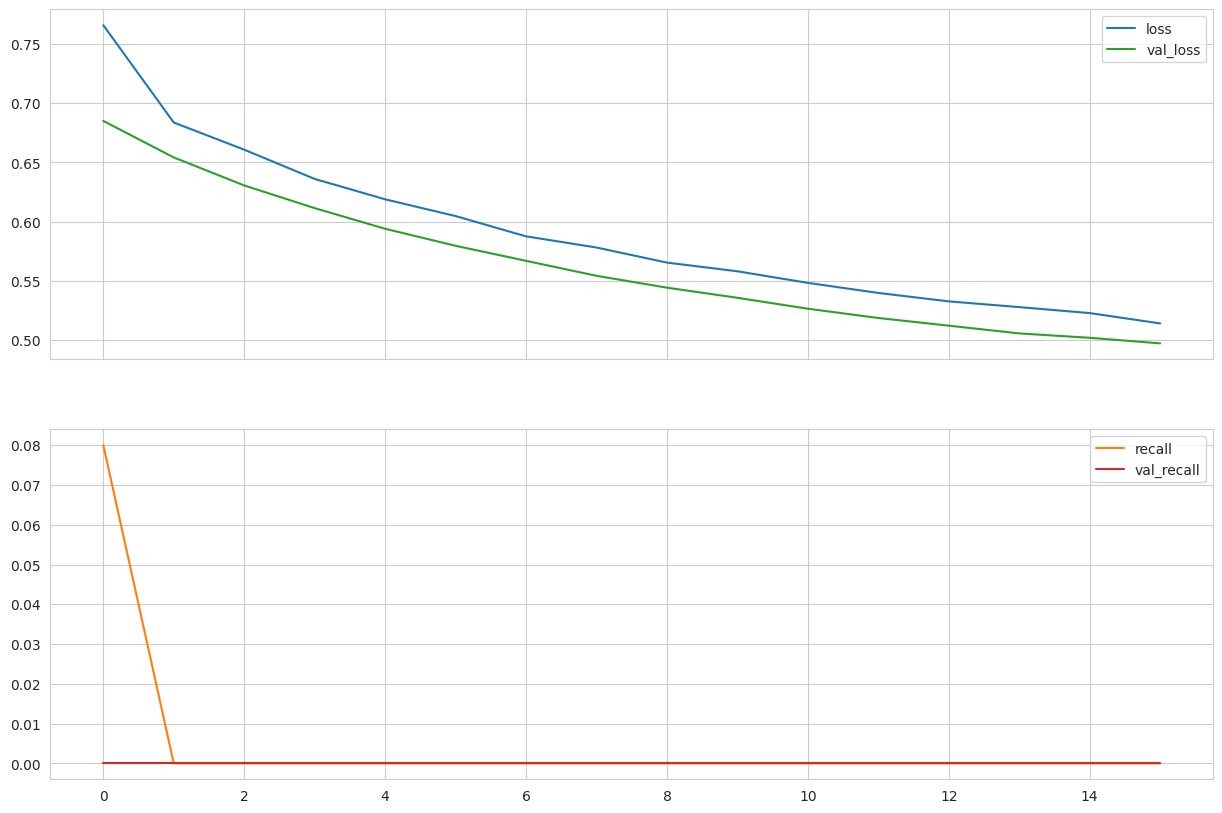

In [346]:
loss_df = pd.DataFrame(history)
loss_df.plot(subplots=[["loss","val_loss"],["recall","val_recall"]], layout=(2,1),figsize=(15,10))
plt.show()

In [347]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[796   0]
 [204   0]]
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       796
         1.0       0.00      0.00      0.00       204

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.80      0.71      1000



32/32 [==============================] - 0s 926us/step


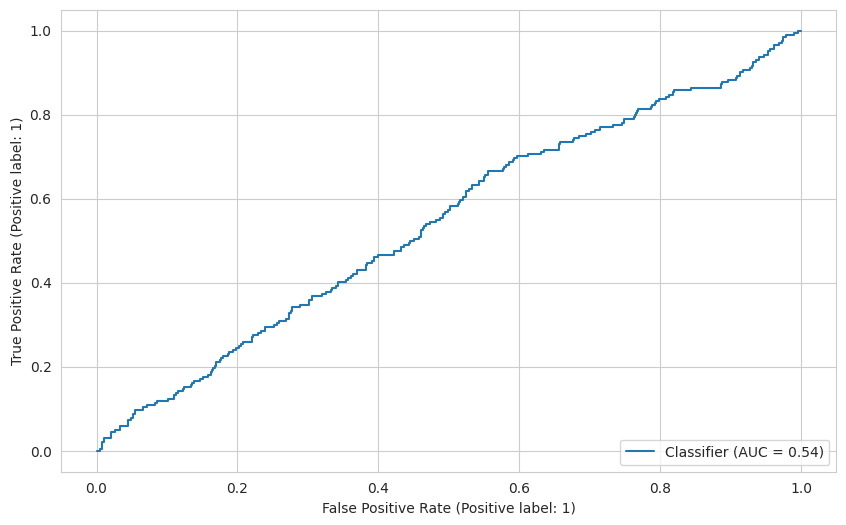

In [348]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [349]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.6884236931800842
recall:  0.0


In [350]:
roc_auc_score(y_test, y_pred_proba)

0.5422516996748448

# Final Model and Model Deployment

In [357]:
import pickle

pickle.dump(scaler, open("scaler_exited", 'wb'))

In [358]:
final_model = Sequential()

final_model.add(Dense(32, activation = "relu"))
final_model.add(Dense(16, activation = "relu"))
final_model.add(Dense(1, activation = "sigmoid"))  

opt = Adam(lr = 0.001)

final_model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [359]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [360]:
class_weight = {0: 0.627906976744186, 1: 2.4545454545454546}

In [361]:
final_model.fit(x = X_train, y = y_train, 
                validation_data = (X_test, y_test), 
                batch_size = 32, 
                epochs = 1000, 
                verbose = 1, 
                callbacks = [early_stop], 
                class_weight = class_weight)

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.6606 - recall: 0.6297 - val_loss: 0.6552 - val_recall: 0.6961
Epoch 2/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.6170 - recall: 0.6533 - val_loss: 0.6343 - val_recall: 0.7206
Epoch 3/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5870 - recall: 0.6739 - val_loss: 0.5981 - val_recall: 0.7108
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5648 - recall: 0.6952 - val_loss: 0.5134 - val_recall: 0.6275
Epoch 5/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5434 - recall: 0.7164 - val_loss: 0.4808 - val_recall: 0.6225
Epoch 6/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5180 - recall: 0.7255 - val_loss: 0.5456 - val_recall: 0.7451
Epoch 7/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5065 - recall: 0.7352 - val_loss: 0.4754 - val_recall: 0.6569
Epoch 8/1000
254/254

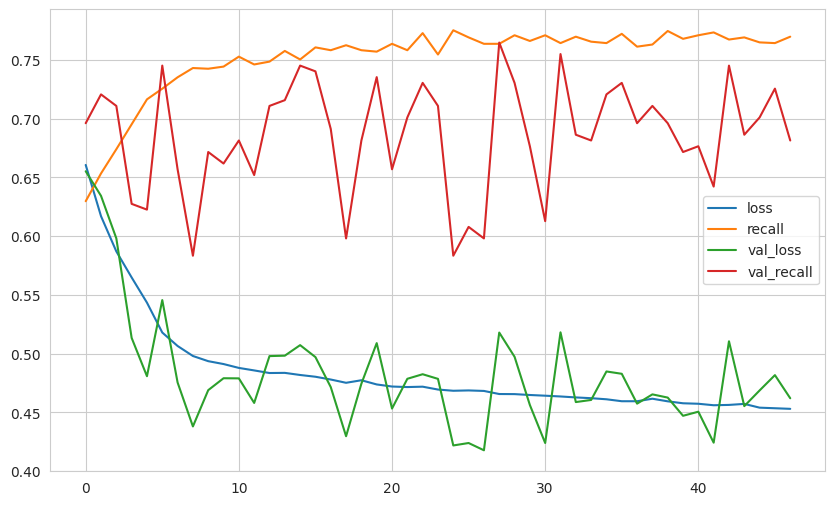

In [362]:
loss_df = pd.DataFrame(final_model.history.history)

loss_df.plot();

In [363]:
y_pred = (final_model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[633 163]
 [ 65 139]]
              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85       796
         1.0       0.46      0.68      0.55       204

    accuracy                           0.77      1000
   macro avg       0.68      0.74      0.70      1000
weighted avg       0.82      0.77      0.79      1000



In [364]:
model.save('model_exited.h5')

## Prediction

In [369]:
from tensorflow.keras.models import load_model

In [370]:
model_exited = load_model('model_exited.h5')

scaler_exited = pickle.load(open("scaler_exited", "rb"))

In [371]:
random_ten_customer = df.sample(n=10, random_state=101).iloc[0:10, :11]

random_ten_customer

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6676,619.000,3,1,52.000,8.000,0.000,2.000,1.000,1.000,123242.110,0.000
6421,616.000,1,1,23.000,8.000,73112.950,1.000,1.000,1.000,62733.050,0.000
9834,516.000,1,0,46.000,6.000,62212.290,1.000,0.000,1.000,171681.860,1.000
8492,494.000,1,1,28.000,9.000,114731.760,2.000,0.000,1.000,79479.740,0.000
9982,655.000,2,0,46.000,7.000,137145.120,1.000,1.000,0.000,115146.400,1.000
8844,695.000,3,1,35.000,7.000,0.000,2.000,1.000,0.000,160387.980,0.000
7247,582.000,2,0,40.000,3.000,110150.430,1.000,1.000,1.000,191757.650,1.000
5862,682.000,1,1,40.000,4.000,0.000,2.000,1.000,1.000,140745.910,0.000
3662,632.000,1,0,28.000,5.000,118890.810,1.000,0.000,1.000,145157.970,0.000
3457,657.000,3,1,36.000,8.000,188241.050,2.000,0.000,0.000,183058.510,1.000


In [ ]:
random_ten_customer = scaler_exited.transform(random_ten_customer)

random_ten_customer

In [ ]:
prediction = pd.DataFrame(model_exited.predict(random_ten_customer) > 0.5, columns=['prediction']).astype("float64")
prediction

In [ ]:
actual = pd.DataFrame(df.sample(n=10, random_state=101)["churn"]).rename({'churn': 'actual'}, axis=1).astype("float64")
actual 

In [ ]:
pred_df = actual.join(prediction.set_index(actual.index))

pred_df

In [ ]:
pred_df['prediction_accuracy'] = pred_df.apply(lambda x: "TRUE" if int(x['actual'] == x['prediction']) else "FALSE", axis=1)

pred_df

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___